In [1]:
# Импорт библиотек и методов 
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from catboost.utils import get_confusion_matrix
from yellowbrick.contrib.wrapper import wrap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.impute import SimpleImputer

# 1. Загрузка массив целей



In [2]:
#Загрузка массива целей
data_goal = pd.read_csv('goal_cipher.csv', sep=',')
data_feature = pd.read_csv('feature_data_new_mini.csv', sep=',') 

C:\Users\Admin\AppData\Local\Temp\ipykernel_9724\650003122.py:3: DtypeWarning: Columns (113,116,119,122,125) have mixed types. Specify dtype option on import or set low_memory=False.
  data_feature = pd.read_csv('feature_data_new_mini.csv', sep=',')


In [3]:
data_goal

,Unnamed: 0,ser_loc,zns_loc,prs_loc,year_month,fail_place,fail_reason,fail_type,day
0,0,134,171.0,1.0,2021-01,Дуриан,Момордика,Мармеладный плод,12
1,3,134,166.0,1.0,2021-01,Маракуйя,Либерика,Салакка,12
2,4,240,1068.0,1.0,2021-01,Земляной орех,Абрикос,Пара-гуайява,5
3,7,240,2200.0,1.0,2021-01,Маракуйя,Гранат,Мармеладный плод,17
4,9,240,2734.0,1.0,2021-01,Земляной орех,Бананы,Гнетум гнемон,4
...,...,...,...,...,...,...,...,...,...
53034,147570,240,1837.0,1.0,2018-11,Земляной орех,Свечное дерево,Мармеладный плод,11
53035,147572,145,84.0,1.0,2018-11,Земляной орех,Свечное дерево,Мармеладный плод,19
53036,147573,145,573.0,1.0,2018-11,Земляной орех,Огуречное дерево,Мармеладный плод,14
53037,147574,240,1506.0,2.0,2018-11,Земляной орех,Кумкват овальный,Горлянка,6


In [4]:
data_feature

,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к_y,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent
0,107,3.0,1.0,2020-01-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
1,107,3.0,1.0,2019-03-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
2,107,4.0,1.0,2020-04-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0
3,107,4.0,1.0,2020-06-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0
4,107,4.0,1.0,2020-07-28,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167249,693,74.0,3.0,2019-03-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,0.0,0.0
167250,693,74.0,3.0,2021-04-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,51.0,51.0
167251,693,74.0,3.0,2021-05-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,55.0,55.0
167252,693,74.0,3.0,2021-07-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,64.0,64.0


# Удаление дубликатов

In [5]:
data_feature = data_feature.drop_duplicates()
data_goal = data_goal.drop_duplicates()

In [6]:
data_feature

,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к_y,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent
0,107,3.0,1.0,2020-01-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
1,107,3.0,1.0,2019-03-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
2,107,4.0,1.0,2020-04-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0
3,107,4.0,1.0,2020-06-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0
4,107,4.0,1.0,2020-07-28,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167249,693,74.0,3.0,2019-03-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,0.0,0.0
167250,693,74.0,3.0,2021-04-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,51.0,51.0
167251,693,74.0,3.0,2021-05-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,55.0,55.0
167252,693,74.0,3.0,2021-07-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,64.0,64.0


In [7]:
data_goal


,Unnamed: 0,ser_loc,zns_loc,prs_loc,year_month,fail_place,fail_reason,fail_type,day
0,0,134,171.0,1.0,2021-01,Дуриан,Момордика,Мармеладный плод,12
1,3,134,166.0,1.0,2021-01,Маракуйя,Либерика,Салакка,12
2,4,240,1068.0,1.0,2021-01,Земляной орех,Абрикос,Пара-гуайява,5
3,7,240,2200.0,1.0,2021-01,Маракуйя,Гранат,Мармеладный плод,17
4,9,240,2734.0,1.0,2021-01,Земляной орех,Бананы,Гнетум гнемон,4
...,...,...,...,...,...,...,...,...,...
53034,147570,240,1837.0,1.0,2018-11,Земляной орех,Свечное дерево,Мармеладный плод,11
53035,147572,145,84.0,1.0,2018-11,Земляной орех,Свечное дерево,Мармеладный плод,19
53036,147573,145,573.0,1.0,2018-11,Земляной орех,Огуречное дерево,Мармеладный плод,14
53037,147574,240,1506.0,2.0,2018-11,Земляной орех,Кумкват овальный,Горлянка,6


# Выделяем целевой массив

In [8]:
#Проверка размерности массива 
data_goal = data_goal[data_goal['fail_reason'] == 'Вампи']
len(data_goal)

632

In [9]:
data_goal

,Unnamed: 0,ser_loc,zns_loc,prs_loc,year_month,fail_place,fail_reason,fail_type,day
31,76,240,975.0,2.0,2021-01,Земляной орех,Вампи,Пара-гуайява,11
687,1825,226,2078.0,2.0,2021-01,Земляной орех,Вампи,Мармеладный плод,25
724,1921,240,111.0,1.0,2021-01,Земляной орех,Вампи,Пара-гуайява,17
726,1928,240,959.0,1.0,2021-01,Земляной орех,Вампи,Пара-гуайява,12
766,2040,240,1129.0,1.0,2021-01,Земляной орех,Вампи,Пара-гуайява,13
...,...,...,...,...,...,...,...,...,...
52574,146210,107,33.0,1.0,2018-08,Земляной орех,Вампи,Пара-гуайява,16
52580,146225,240,44.0,2.0,2018-08,Земляной орех,Вампи,Пара-гуайява,26
52593,146273,233,1644.0,1.0,2018-08,Земляной орех,Вампи,Пара-гуайява,5
52696,146656,240,1707.0,1.0,2018-09,Земляной орех,Вампи,Пара-гуайява,1


# Готовим данные к объединению

In [10]:
# Вводим ключи для объединения
data_goal = data_goal[['ser_loc','zns_loc','prs_loc','year_month', 'day']]

data_goal.columns = [x.lower() for x in data_goal.columns]

data_goal['day'] = [int(x) for x in data_goal['day']]
data_feature.head()

data_feature['year_month'] = pd.to_datetime(data_feature['year_month'], format='%Y-%m')
data_goal['year_month'] = pd.to_datetime(data_goal['year_month'], format='%Y-%m')

data_feature['year_month'] = data_feature['year_month'].dt.to_period('M')
data_goal['year_month'] = data_goal['year_month'].dt.to_period('M')

data_feature.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9724\1813980774.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_goal['day'] = [int(x) for x in data_goal['day']]
C:\Users\Admin\AppData\Local\Temp\ipykernel_9724\1813980774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_feature['year_month'] = pd.to_datetime(data_feature['year_month'], format='%Y-%m')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9724\1813980774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к_y,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent
0,107,3.0,1.0,2020-01,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
1,107,3.0,1.0,2019-03,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
2,107,4.0,1.0,2020-04,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0
3,107,4.0,1.0,2020-06,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0
4,107,4.0,1.0,2020-07,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0


In [11]:
len(data_goal.index)

632

# 2. Производим объединение массива


In [12]:
data_new = data_feature.merge(data_goal, on = ['ser_loc','zns_loc','prs_loc','year_month'], how = 'outer')
data_new.head()

,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent,day
0,107,3.0,1.0,2020-01,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0,NaN
1,107,3.0,1.0,2019-03,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0,NaN
2,107,4.0,1.0,2020-04,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0,NaN
3,107,4.0,1.0,2020-06,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0,NaN
4,107,4.0,1.0,2020-07,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0,NaN


#  3. Выполняем обработку пропусков после объединения

Поиск и чистка плохих столбцов

Убираем пустые значения в строках(в слобце 'count_fail')

In [13]:
data_new = data_new.dropna(subset = ['count_fail'])

In [14]:
i = 0
for col_name in data_new.columns:
    if col_name.find('_x_') == True:
        print(i)
    i += 1    

Убираем неиспользуемые столбцы

In [15]:
data_new = data_new.drop(columns=['date_repair_finish_y_1',
       'date_repair_finish_x_2',
       'date_repair_finish_y_2', 'date_repair_finish', 
       'date_repair_finish_x_1'])
       

In [16]:
data_new

,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent,day
0,107,3.0,1.0,2020-01,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0,NaN
1,107,3.0,1.0,2019-03,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0,NaN
2,107,4.0,1.0,2020-04,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0,NaN
3,107,4.0,1.0,2020-06,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0,NaN
4,107,4.0,1.0,2020-07,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165724,693,74.0,3.0,2019-03,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,0.0,0.0,NaN
165725,693,74.0,3.0,2021-04,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,51.0,51.0,NaN
165726,693,74.0,3.0,2021-05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,55.0,55.0,NaN
165727,693,74.0,3.0,2021-07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,64.0,64.0,NaN


Выбрали метод обучения - классификация

# 5. Исходя из выбранного метода преобразовываем целевые метки.


1) Заменяем значение дней на 1, если не NaN, иначе 0


2) Заменяем NaN на 0


3) ser_loc,  zns_loc, prs_loc, year_month – столбцы идентификаторы


In [17]:
#заполнение пропусков в столбце day нулями, если данные есть то единицы
#Если день не NaN, то он становится 1, иначе 0
data_new['day'] = [1 if x > 0 else 0 for x in data_new['day']]
data_new = data_new.set_index(['ser_loc','zns_loc','prs_loc','year_month'])
# направляем столбцы идентификаторы в индексы, потому что они не признаки.

# 6. Инженерия данных

Все единицы и нули 

In [18]:
data_new['day'].value_counts()

0    165669
1        60
Name: day, dtype: int64

Необходима балансировка и нормализация данных

Нормирование данных

In [19]:
scaler = preprocessing.MinMaxScaler()
d_scaler = scaler.fit_transform(data_new)
data_new = pd.DataFrame(d_scaler,columns = data_new.columns, index=data_new.index)


Разделяем датасет на X  Y  

In [20]:
X = data_new.drop(columns=['day'])
y = data_new[['day']]

Применяем балансировку, потому что в столбце day виден перевес нулей и единиц

После балансировки разбиваем данные на тренировочную (train)  и тестовую (test)

In [21]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)


# 7. Выбрали модель и метод её обучения

In [22]:
clf = CatBoostClassifier(
    iterations=100, # макс колво деревьев
    learning_rate=0.2, # уменьшение шага градиента
    loss_function='CrossEntropy'
)

clf.fit(X_train, y_train,         
        eval_set=(X_test, y_test), 
        verbose=False
)

In [23]:
y_pred = clf.predict(X_test)

8. ПРОВЕРКА КАЧЕСТВА 

НАПИШЕМ СВОЮ ФУНКЦИЮ ДЛЯ ПРОВЕРКИ КАЧЕТСВА

In [24]:
X_test = X_test.fillna(X_train.mean())

In [25]:
y_train.value_counts

<bound method DataFrame.value_counts of         day
6875    0.0
71242   0.0
284163  1.0
106719  0.0
187617  1.0
...     ...
119879  0.0
259178  1.0
131932  0.0
146867  0.0
121958  0.0

[221996 rows x 1 columns]>

In [26]:
cm = get_confusion_matrix(clf, Pool(np.array(X_train), np.array(y_train)))
cm

array([[1.10920e+05, 4.00000e+00],
       [1.50000e+01, 1.11057e+05]])

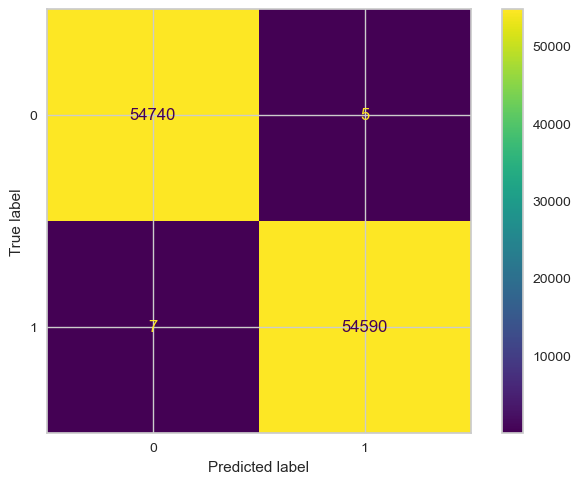

In [27]:
cmm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmm,
                              display_labels=clf.classes_)

disp.plot()
plt.show()

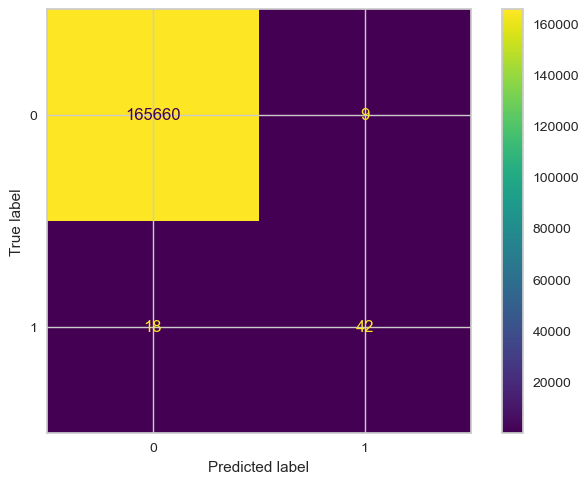

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y['day'], clf.predict(X), labels=clf.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp_rf.plot()

Сравниваем встроенные функции проверки качества с нашими.

In [29]:
tree_model = DecisionTreeClassifier(max_depth = 10,
    criterion='gini',
    splitter='best'
    )
tree_model.fit(X_res, y_res)

train_score = tree_model.score(X_res, y_res) # train (learn) score
val_score = tree_model.score(X_test, y_test) # val (test) score
print('Точность на тренировочной выборке', train_score)
print('Точность на тестовой выборке', val_score)

Точность на тренировочной выборке 0.9964748987438808
Точность на тестовой выборке 0.9963417533975966


In [30]:
Predict_test = y_test.copy()
Predict_test['predict'] = tree_model.predict(X_test)
print('Вероно спрогнозированное событие, %: ', len(Predict_test[(Predict_test['predict'] == 1)&(Predict_test['day'] == 1)].index)/len(Predict_test[Predict_test['day'] == 1].index))
print('Вероно спрогнозированное отсуствие события, %: ', len(Predict_test[(Predict_test['predict'] == 0)&(Predict_test['day'] == 0)].index)/len(Predict_test[Predict_test['day'] == 0].index))

len(Predict_test[(Predict_test['predict'] == 1)&(Predict_test['day'] == 1)].index)/len(Predict_test.index)

Вероно спрогнозированное событие, %:  0.99941388720992
Вероно спрогнозированное отсуствие события, %:  0.9932779249246506


0.4990305646503631

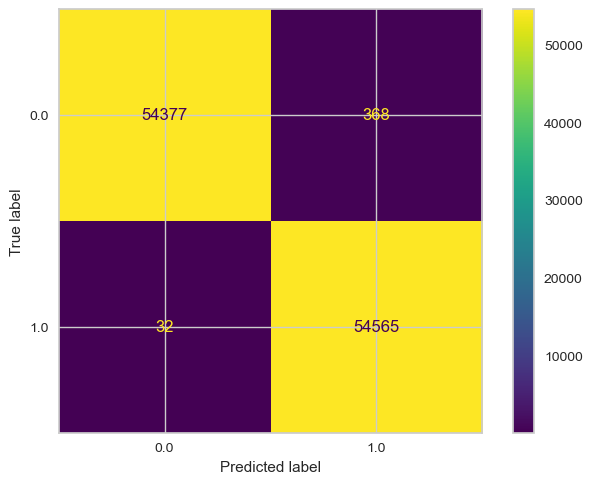

In [31]:
сmm_tree_1 = confusion_matrix(y_test, tree_model.predict(X_test), labels=tree_model.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=сmm_tree_1,
                              display_labels=tree_model.classes_)
disp_tree.plot()

In [32]:
val_score = clf.score(X_test, y_test) # val (test) score
val_score

0.9998902526019279

In [33]:
from sklearn.metrics import f1_score
f1_score(y['day'], clf.predict(X))

0.7567567567567567

In [34]:
def f1_score_my():
    tn, fp, fn, tp = cm.ravel()
    precission = tp / (tp + fp)
    recall = tp / (tp + fn)
    return 2 * (precission * recall) / (precission + recall)

print(f1_score_my())

0.7567567567567567
